# **HOMEWORK 7** 

**VIGNESH PRABHAKAR**<br>
**USC ID:** : 4024890667


# **Generative Models for Text**

# (1)(a) & (1)(b)

Mounted data from google drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os

# (1)(c)(i)

In [0]:
with open("/gdrive/My Drive/Homeworks/corpus.txt","w", encoding='utf-8') as fpw:
    for files in os.listdir('/gdrive/My Drive/Homeworks/hw7/'):
            with open('/gdrive/My Drive/Homeworks/hw7/' + files,"r", encoding='utf-8',errors='ignore') as fpr:
                print ("Writing " + files)
                for l in fpr:
                    txt = ' '.join(l.split())
                    txt = txt.lower()
                    fpw.write(txt + ' ')
    print ("corpus.txt is ready")

Writing TAM.txt
Writing TAMatter.txt
Writing THWP.txt
Writing TPP.txt
Writing MLOE.txt
Writing OKEWFSMP.txt
Writing AIIMAT.txt
corpus.txt is ready


# (1)(c)(ii)

In [0]:
with open("/gdrive/My Drive/Homeworks/corpus.txt","r", encoding='utf-8') as fp:
    gen_corpus = fp.read()
corpus_characters = list(set(gen_corpus))

In [0]:
del corpus_characters[51]

In [0]:
print (corpus_characters)

['γ', '3', 'β', 'ü', '4', 'k', 'ο', '?', '(', '|', '°', '7', '=', '$', '—', '±', "'", '_', 'α', '1', '~', 'σ', 'ί', 'ι', '¥', 'ό', 'b', '#', '′', 'ï', '»', '£', '^', '♦', 'ρ', 'λ', 'd', 'f', ';', 'q', '/', 'c', 'h', 'η', '*', '■', 'x', '<', '}', '„', '\\', '.', '2', '>', 'ν', 'o', 'w', '«', 'œ', 'ὴ', '+', '[', 'u', 'i', '·', ':', '€', 'm', '"', ']', 'î', 'κ', 'ë', 'p', ')', '§', '™', '6', 'l', '8', '0', 'ô', 'ή', 't', 'τ', 'ö', 'y', '!', 'n', 'æ', ' ', '-', 'r', '&', '®', 'z', '″', 'â', 's', 'a', 'ὸ', 'π', 'e', 'φ', 'è', '•', '9', '%', 'θ', '►', '5', '{', ',', 'v', 'g', 'ŭ', 'é', 'j']


In [0]:
print (len(corpus_characters))

118


In [0]:
import re
new_corpus=re.sub(r'\W+', '',gen_corpus)

In [0]:
new_corp_char = list(set(new_corpus))
print(new_corp_char)

['i', 'γ', '3', 'z', 'β', 'â', 'ü', 's', 'a', '4', 'm', 'k', 'ὸ', 'î', 'κ', 'ὴ', 'ë', 'ο', 'π', 'ρ', 'p', 'e', '7', 'λ', 'φ', '6', 'ï', 'l', '9', '8', 'è', '0', 'ô', 'θ', 'ή', '_', 'α', 't', '1', 'd', 'ί', 'f', 'σ', 'q', '5', 'c', 'τ', 'ι', 'ö', 'h', 'y', 'η', 'x', 'v', 'g', 'ŭ', 'n', 'æ', 'ό', 'b', '2', 'é', 'ν', 'o', 'w', 'œ', 'j', 'r', 'u']


In [0]:
len(new_corp_char)

69

In [0]:
characters = dict()
for i in new_corp_char:
    characters[i] = ord(i)
print (characters)

{'i': 105, 'γ': 947, '3': 51, 'z': 122, 'β': 946, 'â': 226, 'ü': 252, 's': 115, 'a': 97, '4': 52, 'm': 109, 'k': 107, 'ὸ': 8056, 'î': 238, 'κ': 954, 'ὴ': 8052, 'ë': 235, 'ο': 959, 'π': 960, 'ρ': 961, 'p': 112, 'e': 101, '7': 55, 'λ': 955, 'φ': 966, '6': 54, 'ï': 239, 'l': 108, '9': 57, '8': 56, 'è': 232, '0': 48, 'ô': 244, 'θ': 952, 'ή': 8053, '_': 95, 'α': 945, 't': 116, '1': 49, 'd': 100, 'ί': 8055, 'f': 102, 'σ': 963, 'q': 113, '5': 53, 'c': 99, 'τ': 964, 'ι': 953, 'ö': 246, 'h': 104, 'y': 121, 'η': 951, 'x': 120, 'v': 118, 'g': 103, 'ŭ': 365, 'n': 110, 'æ': 230, 'ό': 8057, 'b': 98, '2': 50, 'é': 233, 'ν': 957, 'o': 111, 'w': 119, 'œ': 339, 'j': 106, 'r': 114, 'u': 117}


In [0]:
min_ascii_val = min(characters.values())
max_ascii_val = max(characters.values())

normalized_ascii_range=dict()
for key in characters.keys():
  normalized_ascii_range[key] = (characters[key] - min_ascii_val)/float(max_ascii_val - min_ascii_val)

print (normalized_ascii_range)

{'i': 0.00711699338244475, 'γ': 0.11224872018978649, '3': 0.00037457859907603946, 'z': 0.009239605443875639, 'β': 0.11212386065676114, 'â': 0.022224996878511673, 'ü': 0.025471344737170682, 's': 0.008365588712698215, 'a': 0.006118117118241978, '4': 0.000499438132101386, 'm': 0.007616431514546136, 'k': 0.007366712448495442, 'ὸ': 0.9998751404669747, 'î': 0.023723311274815834, 'κ': 0.11312273692096392, 'ὴ': 0.9993757023348733, 'ë': 0.02334873267573979, 'ο': 0.11374703458609065, 'π': 0.113871894119116, 'ρ': 0.11399675365214135, 'p': 0.007991010113622176, 'e': 0.006617555250343364, '7': 0.0008740167311774254, 'λ': 0.11324759645398927, 'φ': 0.11462105131726807, '6': 0.0007491571981520789, 'ï': 0.023848170807841178, 'l': 0.007491571981520789, '9': 0.0011237357972281184, '8': 0.000998876264202772, 'è': 0.022974154076663752, '0': 0.0, 'ô': 0.024472468472967912, 'θ': 0.11287301785491322, 'ή': 0.9995005618678986, '_': 0.005868398052191285, 'α': 0.1119990011237358, 't': 0.00849044824572356, '1': 0.

# (1)(c)(iii)

In [0]:
window_size=100

# (1)(c)(iv)

In [0]:
d=[]
lbl=[]

for i in range(len(new_corpus) - (window_size-1)):
    d.append(new_corpus[i: i+window_size-1])
    lbl.append(new_corpus[i+window_size-1])

for i in range(10):
    print(len(d[i]),d[i],lbl[i])

99 theanalysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareintheha b
99 heanalysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehab i
99 eanalysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabi t
99 analysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabit o
99 nalysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabito f
99 alysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabitof c
99 lysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabitofc a
99 ysisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabitofca l
99 sisofmindlectureirecentcriticismsofconsciousnesstherearecertainoccurrenceswhichweareinthehabitofcal l
99 isofmindlectureirecentcriticismsofconsciousnessthere

In [0]:
numerical=[]
for x in d:
    data_number = []
    for i in x:
        data_number.append(normalized_ascii_range[i])
    numerical.append(data_number)

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
print(len(numerical))

3989395


In [0]:
print(numerical[0])

[0.00849044824572356, 0.006992133849419403, 0.006617555250343364, 0.006118117118241978, 0.007741291047571482, 0.006118117118241978, 0.007491571981520789, 0.009114745910850293, 0.008365588712698215, 0.00711699338244475, 0.008365588712698215, 0.007866150580596828, 0.006742414783368711, 0.007616431514546136, 0.00711699338244475, 0.007741291047571482, 0.006492695717318017, 0.007491571981520789, 0.006617555250343364, 0.0063678361842926705, 0.00849044824572356, 0.008615307778748908, 0.008240729179672867, 0.006617555250343364, 0.00711699338244475, 0.008240729179672867, 0.006617555250343364, 0.0063678361842926705, 0.006617555250343364, 0.007741291047571482, 0.00849044824572356, 0.0063678361842926705, 0.008240729179672867, 0.00711699338244475, 0.00849044824572356, 0.00711699338244475, 0.0063678361842926705, 0.00711699338244475, 0.008365588712698215, 0.007616431514546136, 0.008365588712698215, 0.007866150580596828, 0.006742414783368711, 0.0063678361842926705, 0.007866150580596828, 0.007741291047

# (1)(c)(v)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(normalized_ascii_range.keys()))
le_lbl = le.transform(lbl)
print (le_lbl)


[12 19 30 ... 28  4 19]


In [0]:
ohe = preprocessing.OneHotEncoder()
print (le_lbl.reshape(-1, 1))
ohe.fit(le_lbl.reshape(-1, 1))
ohe_lbl = ohe.transform(le_lbl.reshape(-1, 1)).toarray()

[[12]
 [19]
 [30]
 ...
 [28]
 [ 4]
 [19]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
print(len(ohe_lbl))
print(ohe_lbl[0])

3989395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# (1) (c) (vi) , (1) (c)(vii) & (1) (c)(viii)

In [0]:
batch_size = len(numerical)
tsteps = window_size-1 
dim = 1
num_classes = len(normalized_ascii_range.keys())

In [0]:
import numpy as np
numerical = np.reshape(numerical, (batch_size,tsteps,dim))

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(LSTM(num_classes, input_shape=(tsteps,dim), activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Using TensorFlow backend.


# (1)(c)(ix) ,(1)(c)(x)

In [0]:
save_model = ModelCheckpoint('LSTM_model.h5', verbose = 1, save_best_only = True,save_weights_only = False, period = 1)

In [0]:
model.fit(numerical,ohe_lbl, batch_size=512, epochs=10, verbose=1, callbacks=[save_model])

Epoch 1/10
3989395/3989395 [==============================] - 1585s 397us/step - loss: 2.8795
Epoch 2/10
3989395/3989395 [==============================] - 1564s 392us/step - loss: 2.8374
Epoch 3/10
3989395/3989395 [==============================] - 1554s 390us/step - loss: 2.8270
Epoch 4/10
3989395/3989395 [==============================] - 1523s 382us/step - loss: 2.8204
Epoch 5/10
3989395/3989395 [==============================] - 1551s 389us/step - loss: 2.8171
Epoch 6/10
3989395/3989395 [==============================] - 1562s 392us/step - loss: 2.8139
Epoch 7/10
3989395/3989395 [==============================] - 1536s 385us/step - loss: 2.8116
Epoch 8/10
3989395/3989395 [==============================] - 1518s 381us/step - loss: 2.8090
Epoch 9/10
3989395/3989395 [==============================] - 1529s 383us/step - loss: 2.8073
Epoch 10/10
3989395/3989395 [==============================] - 1533s 384us/step - loss: 2.8501


# (1)(c)(xi)

In [0]:
test_data="There are those who take mental phenomena naively, just as they would physical phenomena. This school of psychologists tends not to emphasize the object."

test_data = test_data.lower()
test_data = re.sub(r'\W+','',test_data)
print (len(test_data))

127


In [0]:
data_ini = []

for i in range(len(test_data) - (window_size - 1) + 1):
    t = []
    for char in test_data[i: i + window_size-1]:
        t.append(normalized_ascii_range[char])
    data_ini.append(t)

generated_str = test_data[i:i+window_size-1]
print (generated_str)
print (len(generated_str))

enomenanaivelyjustastheywouldphysicalphenomenathisschoolofpsychologiststendsnottoemphasizetheobject
99


In [0]:
data_ini = np.reshape(data_ini,(len(data_ini),window_size-1,1))

preds = model.predict(data_ini)
generated_char_ind = np.argmax(preds[-1]) 
generated_char = le.inverse_transform([generated_char_ind])
print (generated_char)
generated_str = generated_str+generated_char[0]
print (generated_str)
print (len(generated_str))

['e']
enomenanaivelyjustastheywouldphysicalphenomenathisschoolofpsychologiststendsnottoemphasizetheobjecte
100


In [0]:
for i in range(0,1000,1):
    inp_str = generated_str[-(window_size-1):] 
    inp_data = []
    for char in inp_str:
        inp_data.append(normalized_ascii_range[char]) 
    inp_data = np.reshape(inp_data,(1,window_size-1,1)) 
    preds = model.predict(inp_data)
    generated_char_ind = np.argmax(preds[-1])
    generated_char = le.inverse_transform([generated_char_ind])
    generated_str = generated_str+generated_char[0]

In [0]:
print (generated_str[-1000:])

eteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteeteetee

# **Deep CNNs for image colorization**

# (2)(a) Downloaded the CIFAR10 dataset

In [0]:
from tflearn.datasets import cifar10

In [0]:
import torch
import numpy as np

In [0]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
from tflearn.data_utils import  to_categorical

train_y = to_categorical(train_y, nb_classes=10)
train_y = train_y[:,2]
test_y = to_categorical(test_y, nb_classes=10)
test_y = test_y[:,2]



# (2)(b) Extract the bird class alone from the CIFAR10 dataset

In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [0]:
train_x = train_x[np.argwhere(train_y==1).ravel()]
test_x = test_x[np.argwhere(test_y==1).ravel()]

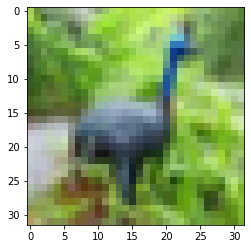

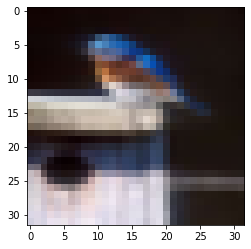

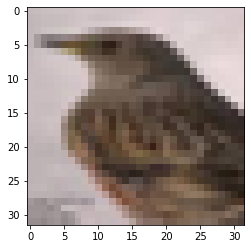

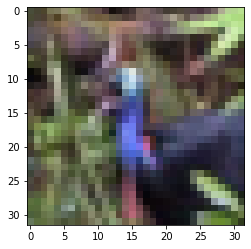

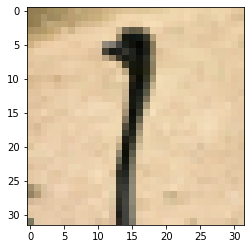

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(train_x[i])
  plt.show()

# (2)(c) Choosing the pixels for training set and test set

In [0]:
train_x = train_x.reshape(5120000,3)    
test_x = test_x.reshape(1024000,3) 

# (2)(d) K-means clustering

In [0]:
from sklearn.cluster import KMeans



In [0]:
cls = KMeans(n_clusters=4,max_iter=1000,random_state=0)
cls.fit(train_x)
center_clus = cls.cluster_centers_

In [0]:
print(center_clus)

[[0.42295172 0.42187529 0.32134431]
 [0.80645087 0.82780156 0.82614268]
 [0.18994147 0.19343499 0.14952672]
 [0.61097739 0.60609819 0.5250555 ]]


In [0]:
color_assignment_train = cls.predict(train_x) 
color_train = list()
cnt=0
for px in train_x:
    color_train.append(center_clus[color_assignment_train[cnt]])
    cnt=cnt+1

In [0]:
cls_test = KMeans(n_clusters=4,max_iter=1000,random_state=0)
test_x_color = cls_test.fit_transform(test_x)
center_clus_test = cls.cluster_centers_

In [0]:
color_assignment_test = cls.predict(test_x) 
color_test = list()
cnt=0
for px in test_x:
    color_test.append(center_clus_test[color_assignment_test[cnt]])
    cnt=cnt+1

In [0]:
color_grp_train = np.reshape(color_train,(5000,32,32,3)) 
color_grp_test = np.reshape(color_test,(1000,32,32,3))

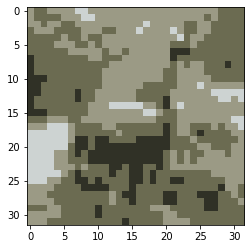

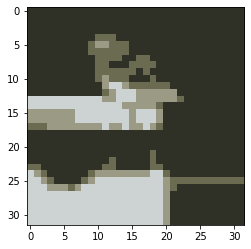

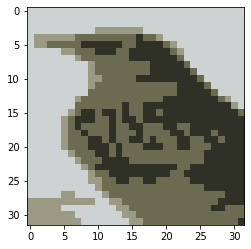

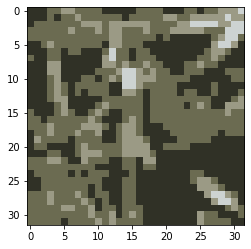

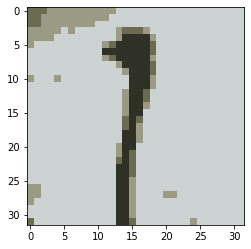

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(color_grp_train[i])
  plt.show()

In [0]:
train_x_gray = np.reshape(train_x,(5000,32,32,3)) 
test_x_gray = np.reshape(test_x,(1000,32,32,3))

# (2)(e) RGB image to grayscale image conversion

In [0]:
from skimage.color import rgb2gray

train_x_gray = rgb2gray(train_x_gray)
test_x_gray = rgb2gray(test_x_gray)



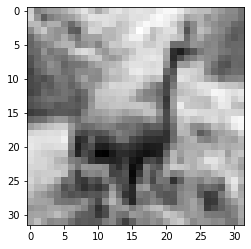

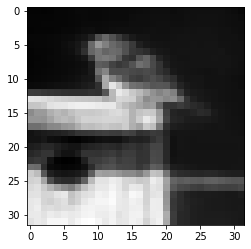

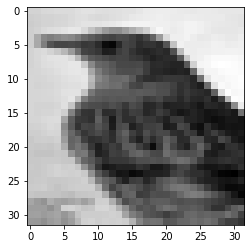

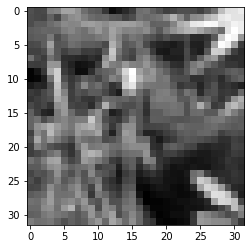

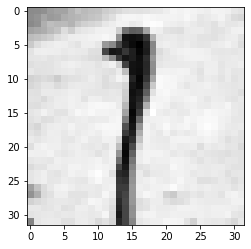

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(train_x_gray[i],cmap='gray')
  plt.show()

# (2)(f) Built the convolutional neural network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

In [0]:
mdl= Sequential()
mdl.add(Conv2D(16,strides=1, kernel_size=(5,5), input_shape=(32,32,1), padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mdl.add(Conv2D(32,strides=1, kernel_size=(5, 5), padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mdl.add(Flatten())
mdl.add(Dense((2048),activation='relu'))
mdl.add(Dense((4096),activation='softmax'))
mdl.summary()
SGD = keras.optimizers.SGD(lr=0.001)
mdl.compile(loss='categorical_crossentropy', optimizer=SGD)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 4096)             

In [0]:
print(train_x_gray.shape)
print(test_x_gray.shape)

(5000, 32, 32)
(1000, 32, 32)


In [0]:
lst1=list(np.unique(color_assignment_train))

In [0]:
from sklearn.preprocessing import OneHotEncoder

train_x_cluster_encoder = list()
enc = OneHotEncoder(handle_unknown='ignore')
X = [[0],[1],[2],[3]]
ohc=enc.fit_transform(X).toarray()


In [0]:
ohc

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [0]:
cnt = 0
for px in train_x:
    train_x_cluster_encoder.append(ohc[color_assignment_train[cnt]])
    cnt= cnt+1
print (np.array(train_x_cluster_encoder).shape)
train_x_cluster_encoder = np.reshape(train_x_cluster_encoder,(5000,4096))
print (train_x_cluster_encoder.shape)

(5120000, 4)
(5000, 4096)


In [0]:
test_x_cluster_encoder = list()
cnt = 0
for px in test_x:
    test_x_cluster_encoder.append(ohc[color_assignment_test[cnt]])
    cnt= cnt+1
print (np.array(test_x_cluster_encoder).shape)
test_x_cluster_encoder = np.reshape(test_x_cluster_encoder,(1000,4096))
print (test_x_cluster_encoder.shape)

(1024000, 4)
(1000, 4096)


In [0]:
train_x_gray = np.reshape(train_x_gray,(5000,32,32,1))
test_x_gray = np.reshape(test_x_gray,(1000,32,32,1))

In [0]:
from keras.callbacks import ModelCheckpoint
save_model = ModelCheckpoint('model.h5', verbose = 1, save_best_only = True,save_weights_only = False, period = 1)

In [0]:
import warnings
warnings.filterwarnings('ignore')
mdl_var = mdl.fit(train_x_gray, train_x_cluster_encoder,batch_size=4,epochs=30,verbose=1,shuffle=True,validation_split=0.1,callbacks=[save_model])

Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 13s 3ms/step - loss: 8059.6739 - val_loss: 8023.7936

Epoch 00001: val_loss improved from inf to 8023.79360, saving model to model.h5
Epoch 2/30
4500/4500 [==============================] - 13s 3ms/step - loss: 7966.4330 - val_loss: 7949.0606

Epoch 00002: val_loss improved from 8023.79360 to 7949.06064, saving model to model.h5
Epoch 3/30
4500/4500 [==============================] - 13s 3ms/step - loss: 7913.5461 - val_loss: 7947.0466

Epoch 00003: val_loss improved from 7949.06064 to 7947.04662, saving model to model.h5
Epoch 4/30
4500/4500 [==============================] - 12s 3ms/step - loss: 7866.3597 - val_loss: 7896.3878

Epoch 00004: val_loss improved from 7947.04662 to 7896.38780, saving model to model.h5
Epoch 5/30
4500/4500 [==============================] - 12s 3ms/step - loss: 7827.1801 - val_loss: 7883.3132

Epoch 00005: val_loss improved from 7896.38780 to 7883.31320, 

Training loss-validation loss comparison with increase in no. of epochs 

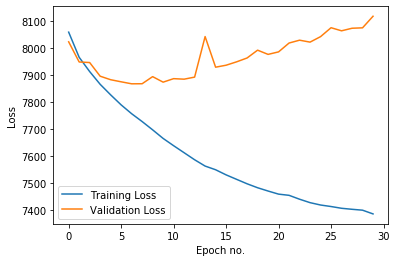

In [0]:
import matplotlib.pyplot as plt

mdl_var = mdl_var.history
plt.plot(mdl_var['loss'])
plt.plot(mdl_var['val_loss'])
plt.xlabel("Epoch no.")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.show()


In [0]:
load_mdl = keras.models.load_model("model.h5")
preds = load_mdl.predict(test_x_gray[:10])

In [0]:
preds = np.reshape(preds,(10240,4)) 



In [0]:
first10_imgs = list()
for px in preds:
    first10_imgs.append(center_clus_test[np.argmax(px)])
first10_imgs = np.reshape(first10_imgs,(10,32,32,3))


In [0]:
test_x= np.reshape(test_x,(1000,32,32,3))

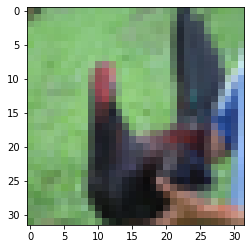

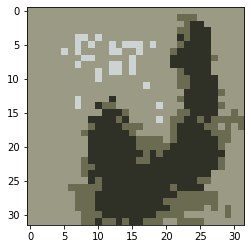

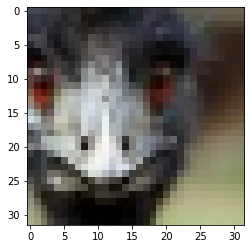

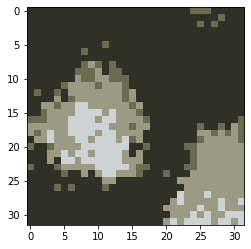

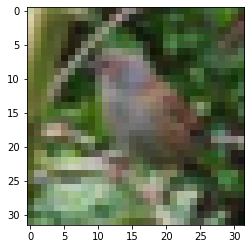

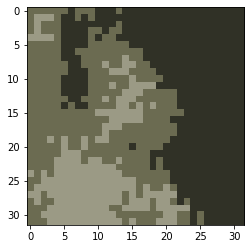

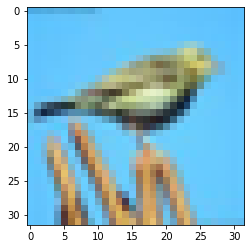

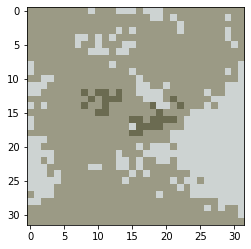

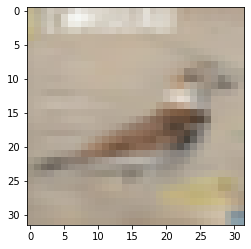

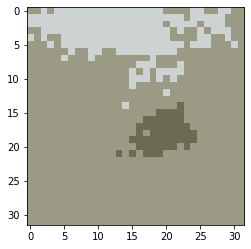

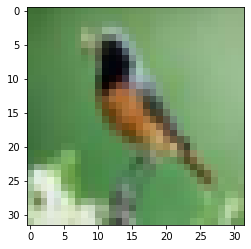

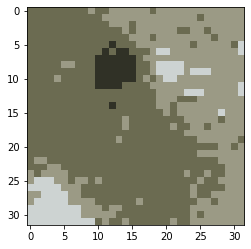

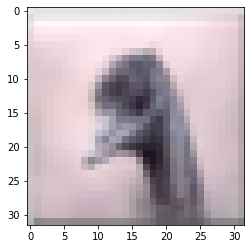

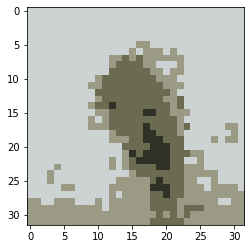

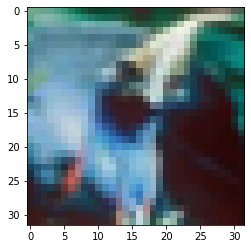

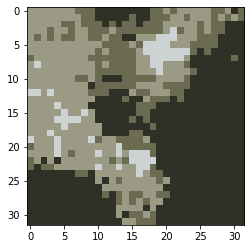

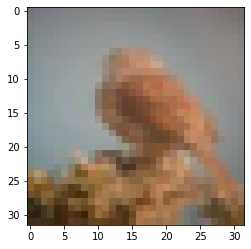

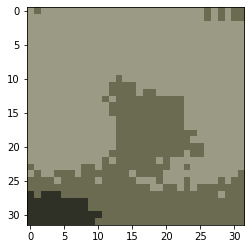

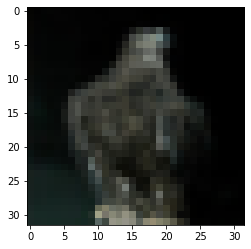

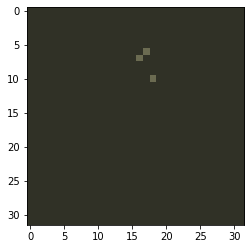

In [0]:
for i in range(0,10,1):
    plt.imshow(test_x[i])
    plt.show()
    plt.imshow(first10_imgs[i])
    plt.show()

# (2)(g) Repeated the whole exercise with K=24 colors and examined the results for the same 

In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
from tflearn.datasets import cifar10

In [0]:
import numpy as np

In [0]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

100.0% 170500096 / 170498071


('Succesfully downloaded', 'cifar-10-python.tar.gz', 170498071, 'bytes.')
File Extracted in Current Directory


In [0]:
from tflearn.data_utils import  to_categorical

train_y = to_categorical(train_y, nb_classes=10)
train_y = train_y[:,2]
test_y = to_categorical(test_y, nb_classes=10)
test_y = test_y[:,2]



In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [0]:
train_x = train_x[np.argwhere(train_y==1).ravel()]
test_x = test_x[np.argwhere(test_y==1).ravel()]

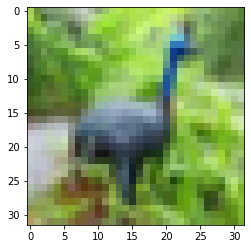

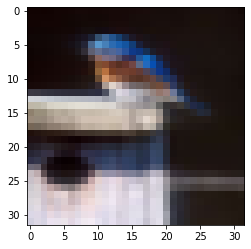

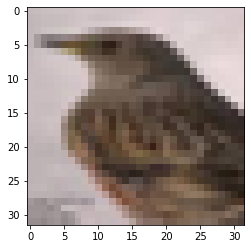

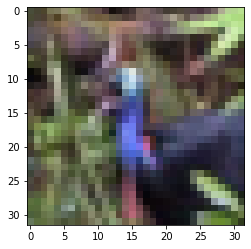

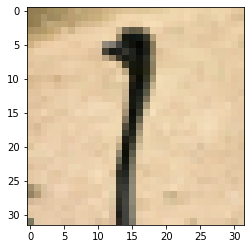

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(train_x[i])
  plt.show()

In [0]:
train_x = train_x.reshape(5120000,3)    
test_x = test_x.reshape(1024000,3) 

In [0]:
from sklearn.cluster import KMeans



In [0]:
cls = KMeans(n_clusters=24,max_iter=1000,random_state=0)
cls.fit(train_x)
center_clus = cls.cluster_centers_

In [0]:
print(center_clus)

[[0.40669228 0.4086219  0.36526281]
 [0.75072828 0.75563024 0.74547101]
 [0.06458406 0.06733115 0.05623066]
 [0.87278513 0.86294491 0.82816444]
 [0.7638851  0.62108245 0.27806711]
 [0.22649664 0.24299728 0.22674639]
 [0.66652478 0.66896275 0.64477543]
 [0.60542988 0.55244217 0.43035736]
 [0.30539814 0.29089453 0.15104851]
 [0.69671157 0.81534923 0.92265918]
 [0.32712495 0.33102103 0.28536243]
 [0.52624185 0.61225193 0.31038174]
 [0.53512287 0.46646024 0.33014911]
 [0.70014199 0.65679126 0.48509174]
 [0.21169273 0.37375077 0.52935343]
 [0.83184576 0.76212316 0.5890217 ]
 [0.47254935 0.48860148 0.47113155]
 [0.16676619 0.1682173  0.12647321]
 [0.96494602 0.96924056 0.96304893]
 [0.51233719 0.67244753 0.84510132]
 [0.39425626 0.48110938 0.21103671]
 [0.34585113 0.5251606  0.72991474]
 [0.47645809 0.35149858 0.21855749]
 [0.56722281 0.58130013 0.56874591]]


In [0]:
color_assignment_train = cls.predict(train_x) 
color_train = list()
cnt=0
for px in train_x:
    color_train.append(center_clus[color_assignment_train[cnt]])
    cnt=cnt+1

In [0]:
cls_test = KMeans(n_clusters=24,max_iter=1000,random_state=0)
test_x_color = cls_test.fit_transform(test_x)
center_clus_test = cls.cluster_centers_

In [0]:
color_assignment_test = cls.predict(test_x) 
color_test = list()
cnt=0
for px in test_x:
    color_test.append(center_clus_test[color_assignment_test[cnt]])
    cnt=cnt+1

In [0]:
color_grp_train = np.reshape(color_train,(5000,32,32,3)) 
color_grp_test = np.reshape(color_test,(1000,32,32,3))

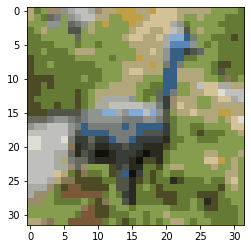

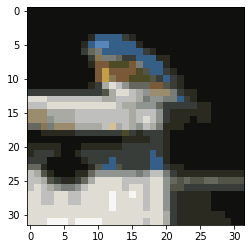

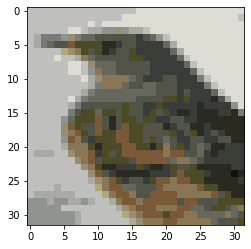

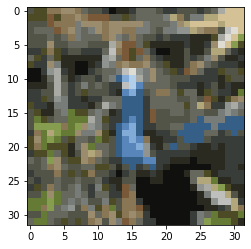

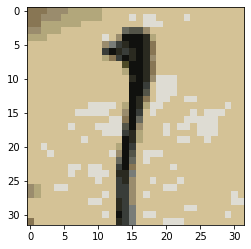

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(color_grp_train[i])
  plt.show()

In [0]:
train_x_gray = np.reshape(train_x,(5000,32,32,3)) 
test_x_gray = np.reshape(test_x,(1000,32,32,3))

In [0]:
from skimage.color import rgb2gray

train_x_gray = rgb2gray(train_x_gray)
test_x_gray = rgb2gray(test_x_gray)



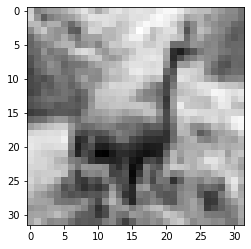

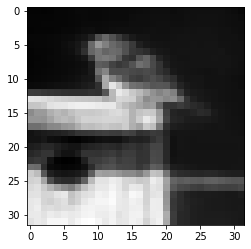

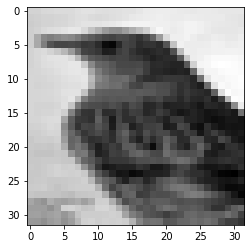

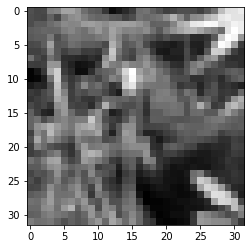

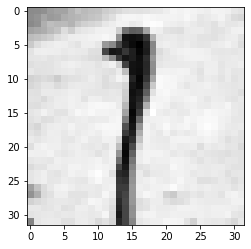

In [0]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(0,5):
  plt.imshow(train_x_gray[i],cmap='gray')
  plt.show()

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

In [0]:
mdl= Sequential()
mdl.add(Conv2D(16,strides=1, kernel_size=(5,5), input_shape=(32,32,1), padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mdl.add(Conv2D(32,strides=1, kernel_size=(5, 5), padding='same', activation='relu'))
mdl.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mdl.add(Flatten())
mdl.add(Dense((2048),activation='relu'))
mdl.add(Dense((24576),activation='softmax'))
mdl.summary()
SGD = keras.optimizers.SGD(lr=0.001)
mdl.compile(loss='categorical_crossentropy', optimizer=SGD)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_4 (Dense)              (None, 24576)            

In [0]:
print(train_x_gray.shape)
print(test_x_gray.shape)

(5000, 32, 32)
(1000, 32, 32)


In [0]:
lst1=list(np.unique(color_assignment_train))

In [0]:
from sklearn.preprocessing import OneHotEncoder

train_x_cluster_encoder = list()
enc = OneHotEncoder(handle_unknown='ignore')
X=list()
for j in range(0,24,1):
  X.append([j])
ohc=enc.fit_transform(X).toarray()


In [0]:
ohc

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [0]:
train_x_cluster_encoder = list()
cnt = 0
for px in train_x:
    train_x_cluster_encoder.append(ohc[color_assignment_train[cnt]])
    cnt= cnt+1
print (np.array(train_x_cluster_encoder).shape)
train_x_cluster_encoder = np.reshape(train_x_cluster_encoder,(5000,24576))
print (train_x_cluster_encoder.shape)

(5120000, 24)
(5000, 24576)


In [0]:
test_x_cluster_encoder = list()
cnt = 0
for px in test_x:
    test_x_cluster_encoder.append(ohc[color_assignment_test[cnt]])
    cnt= cnt+1
print (np.array(test_x_cluster_encoder).shape)
test_x_cluster_encoder = np.reshape(test_x_cluster_encoder,(1000,24576))
print (test_x_cluster_encoder.shape)

(1024000, 24)
(1000, 24576)


In [0]:
train_x_gray = np.reshape(train_x_gray,(5000,32,32,1))
test_x_gray = np.reshape(test_x_gray,(1000,32,32,1))

In [0]:
from keras.callbacks import ModelCheckpoint
save_model = ModelCheckpoint('model.h5', verbose = 1, save_best_only = True,save_weights_only = False, period = 1)

In [0]:
import warnings
warnings.filterwarnings('ignore')
mdl_var = mdl.fit(train_x_gray, train_x_cluster_encoder,batch_size=4,epochs=30,verbose=1,shuffle=True,validation_split=0.1,callbacks=[save_model])

Train on 4500 samples, validate on 500 samples
Epoch 1/30
4500/4500 [==============================] - 43s 10ms/step - loss: 9954.6679 - val_loss: 9828.0928

Epoch 00001: val_loss improved from inf to 9828.09276, saving model to model.h5
Epoch 2/30
4500/4500 [==============================] - 43s 10ms/step - loss: 9774.2838 - val_loss: 9745.1140

Epoch 00002: val_loss improved from 9828.09276 to 9745.11403, saving model to model.h5
Epoch 3/30
4500/4500 [==============================] - 43s 10ms/step - loss: 9635.7593 - val_loss: 9815.0513

Epoch 00003: val_loss did not improve from 9745.11403
Epoch 4/30
4500/4500 [==============================] - 43s 9ms/step - loss: 9525.9194 - val_loss: 9653.9428

Epoch 00004: val_loss improved from 9745.11403 to 9653.94279, saving model to model.h5
Epoch 5/30
4500/4500 [==============================] - 43s 10ms/step - loss: 9402.1161 - val_loss: 9691.6054

Epoch 00005: val_loss did not improve from 9653.94279
Epoch 6/30
4500/4500 [===============

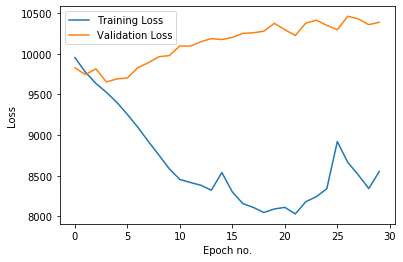

In [0]:
import matplotlib.pyplot as plt

mdl_var = mdl_var.history
plt.plot(mdl_var['loss'])
plt.plot(mdl_var['val_loss'])
plt.xlabel("Epoch no.")
plt.ylabel("Loss")
plt.legend(['Training Loss','Validation Loss'])
plt.show()


In [0]:
load_mdl = keras.models.load_model("model.h5")
preds = load_mdl.predict(test_x_gray[:10])

In [0]:
preds = np.reshape(preds,(10240,24)) 



In [0]:
first10_imgs = list()
for px in preds:
    first10_imgs.append(center_clus_test[np.argmax(px)])
first10_imgs = np.reshape(first10_imgs,(10,32,32,3))


In [0]:
test_x= np.reshape(test_x,(1000,32,32,3))

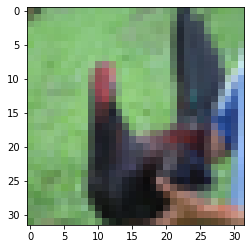

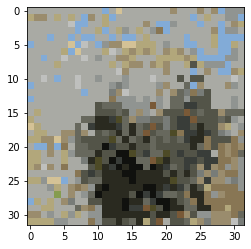

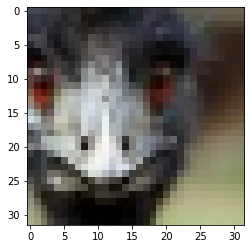

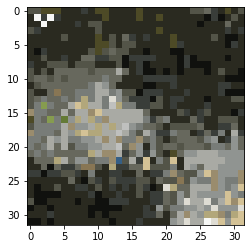

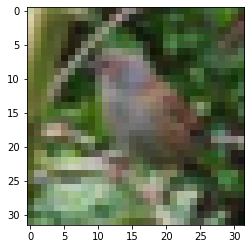

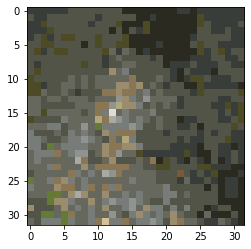

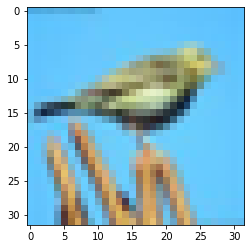

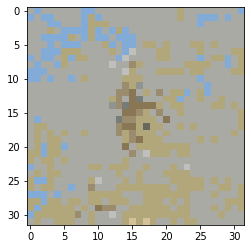

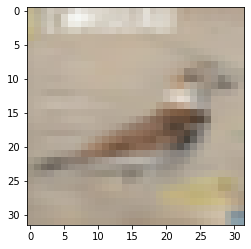

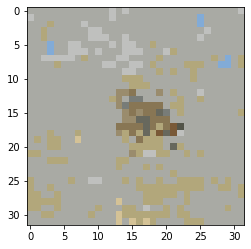

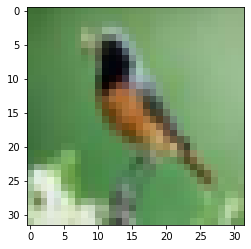

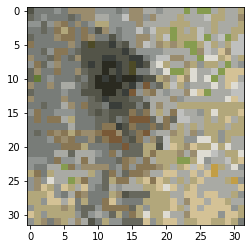

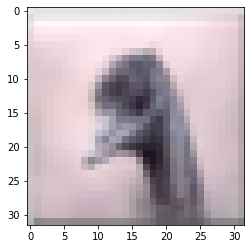

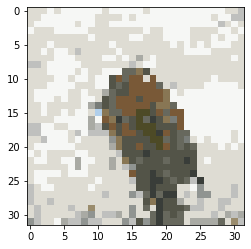

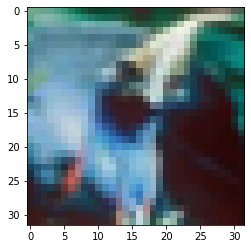

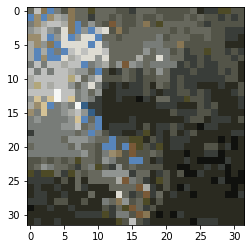

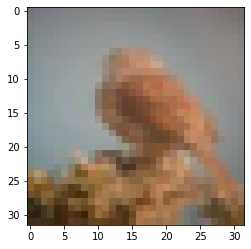

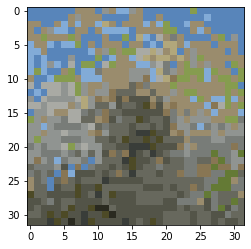

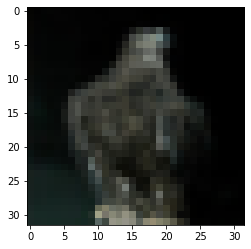

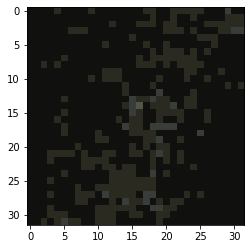

In [0]:
for i in range(0,10,1):
    plt.imshow(test_x[i])
    plt.show()
    plt.imshow(first10_imgs[i])
    plt.show()